# Preprocessing

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.offline as pyoff

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

In [22]:
# importing the data
dataset = pd.read_csv('PDFMalware2022.csv')

#dropping null values
dataset = dataset.dropna()

#dropping non selected features
dataset = dataset.drop(['xref Length', 'images', 'title characters', 'JS', 'endobj', 'endstream', 'startxref', 'encrypt', 'ObjStm', 'AA', 'Acroform', 'RichMedia', 'EmbeddedFile', 'XFA', 'Colors', 'pages'], axis=1)

#ecoding some of the features to numerical values
dataset['text'] = LabelEncoder().fit_transform(dataset['text'])
dataset['header'] = LabelEncoder().fit_transform(dataset['header'])
dataset['Fine name'] = LabelEncoder().fit_transform(dataset['Fine name'])
dataset['pageno'] = LabelEncoder().fit_transform(dataset['pageno'])
dataset['JBIG2Decode'] = LabelEncoder().fit_transform(dataset['JBIG2Decode'])
dataset['OpenAction'] = LabelEncoder().fit_transform(dataset['OpenAction'])
dataset['Javascript'] = LabelEncoder().fit_transform(dataset['Javascript'])
dataset['OpenAction'] = LabelEncoder().fit_transform(dataset['OpenAction'])
dataset['launch'] = LabelEncoder().fit_transform(dataset['launch'])
dataset['xref'] = LabelEncoder().fit_transform(dataset['xref'])
dataset['stream'] = LabelEncoder().fit_transform(dataset['stream'])
dataset['obj'] = LabelEncoder().fit_transform(dataset['obj'])




dataset.head()
dataset.count()

Fine name         10023
pdfsize           10023
metadata size     10023
isEncrypted       10023
embedded files    10023
text              10023
header            10023
obj               10023
stream            10023
xref              10023
trailer           10023
pageno            10023
Javascript        10023
OpenAction        10023
JBIG2Decode       10023
launch            10023
Class             10023
dtype: int64

In [23]:
# split the data in input and labels
X = dataset.iloc[:, 0:15]
y = dataset.iloc[:, 16]

In [24]:
# scaling the data
X = StandardScaler().fit_transform(X)

In [25]:
#checking X
print(X)

[[ 0.65666897 -0.1783485  -0.09842721 ... -0.36308725  1.12290206
  -0.00894573]
 [ 1.71148671 -0.16259047 -0.07032889 ... -0.52284245 -0.436157
  -0.00894573]
 [-0.56508093 -0.18735309  0.08548908 ...  1.07470958  1.12290206
  -0.00894573]
 ...
 [ 1.24110436 -0.18735309  0.02737664 ... -0.36308725  1.12290206
  -0.00894573]
 [ 0.69537788 -0.11081406  0.00247131 ... -0.36308725  1.12290206
  -0.00894573]
 [ 0.76933954 -0.19185539 -0.09842721 ...  0.43568876 -0.436157
  -0.00894573]]


In [26]:
#checking y
print(y)

0        Malicious
1        Malicious
2        Malicious
3        Malicious
4        Malicious
           ...    
10021    Malicious
10022    Malicious
10023    Malicious
10024    Malicious
10025    Malicious
Name: Class, Length: 10023, dtype: object


In [27]:
# counting the total number of rows
target_balance = dataset['Class'].value_counts().reset_index()

# parting the labels into their specific category (benign or malicious)
target_class = go.Bar(
    name = 'label',
    x = ['Malicious', 'Benign'],
    y = target_balance['Class'])

# ploting the count of each class category
fig = go.Figure(target_class)
pyoff.iplot(fig)

In [28]:
# test data is assigned to 25%
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=32)

# SVM

In [29]:
# initiating the model, kernel is selected to rbf
classifier = SVC(kernel ='rbf')

# training the model
classifier.fit(X_train, y_train)

SVC()

In [30]:
# predict the classes with the model
y_pred = classifier.predict(X_test)

In [31]:
# printing the accuracy of the model
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Model accuracy score: 0.9617
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      1118
   Malicious       0.97      0.96      0.97      1388

    accuracy                           0.96      2506
   macro avg       0.96      0.96      0.96      2506
weighted avg       0.96      0.96      0.96      2506



In [32]:
# creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [33]:
# assigning the index and columns
cm_df = pd.DataFrame(cm, 
                    index = ['Malicious', 'Benign'],
                     columns = ['Malicious', 'Benign'])

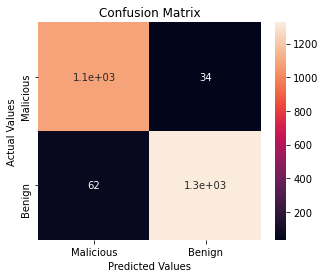

In [34]:
# plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Naive bayes


In [35]:
# instantiating the model
gnb = GaussianNB()

# training the model
gnb.fit(X_train, y_train)

GaussianNB()

In [36]:
# predict the classes with the model
y_pred = gnb.predict(X_test)

In [37]:
# printing the accuracy of the model
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Model accuracy score: 0.8005
              precision    recall  f1-score   support

      Benign       0.70      0.97      0.81      1118
   Malicious       0.97      0.66      0.79      1388

    accuracy                           0.80      2506
   macro avg       0.83      0.82      0.80      2506
weighted avg       0.85      0.80      0.80      2506



# Logistic regression


In [38]:
# initiating the model
logreg = LogisticRegression()

# training the model
logreg.fit(X_train, y_train)

LogisticRegression()

In [39]:
# predict the classes with the model
y_pred = logreg.predict(X_test)

In [40]:
# printing the accuracy of the model
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Model accuracy score: 0.9441
              precision    recall  f1-score   support

      Benign       0.93      0.95      0.94      1118
   Malicious       0.96      0.94      0.95      1388

    accuracy                           0.94      2506
   macro avg       0.94      0.94      0.94      2506
weighted avg       0.94      0.94      0.94      2506



# AdaBoostClassifier

In [41]:
# initiating the model, n_estimators is set to 590, earning rate to 1
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)

# training the model
model = abc.fit(X_train, y_train)

# predict the classes with the model
y_pred = model.predict(X_test)

In [42]:
# printing the accuracy of the model
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Model accuracy score: 0.9808
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98      1118
   Malicious       0.98      0.98      0.98      1388

    accuracy                           0.98      2506
   macro avg       0.98      0.98      0.98      2506
weighted avg       0.98      0.98      0.98      2506

